In [14]:
# Import necessary libraries- 

import numpy as np
import pandas as pd

# Read the dataset-
df = pd.read_csv("Uncleaned.csv")
df.head()

,Employee ID,Employee Name,Employee Position,Salary,Age,Gender,Department,Hire Date
0,178,Christopher Reilly,employee,99280,62.0,Male,Accounts,28-07-2020
1,2,Jennifer Newton,employee,66717,NaN,Male,NaN,04-11-2018
2,42,Dakota Khan,Administrator,87759,56.0,Female,Accounts,30-03-2023
3,177,Nancy Long,Techies,75973,59.0,Male,Manegement,27-06-2018
4,55,Jeffrey Miller,Techies,67856,45.0,Male,Administration,19-03-2022


In [29]:
# Shape of the data-

print(f"Number of rows:    {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows:    208
Number of columns: 8


In [3]:
# Display initial overview -

print("Initial data overview: ")
df.info()

Initial data overview: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee ID        208 non-null    int64  
 1   Employee Name      208 non-null    object 
 2   Employee Position  208 non-null    object 
 3   Salary             205 non-null    object 
 4   Age                206 non-null    float64
 5   Gender             207 non-null    object 
 6   Department         205 non-null    object 
 7   Hire Date          207 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.1+ KB


In [4]:
# Overall statistics - 

df.describe()

,Employee ID,Age
count,208.000000,206.000000
mean,100.509615,47.378641
std,58.412575,13.436112
min,1.000000,-5.000000
25%,50.750000,37.000000
50%,100.500000,46.000000
75%,151.250000,57.000000
max,200.000000,150.000000


In [15]:
# Checking for duplicate rows -

duplicate = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate}")

print("\nRemoving duplicate rows.")
df = df.drop_duplicates()
print("\nDuplicate rows are removed.")

Number of duplicate rows: 5

Removing duplicate rows.

Duplicate rows are removed.


In [16]:
# Handeling missing values & outliers - 

missing_vals = df.isna().sum()
missing_pct = (missing_vals/len(df))*100

missing = {
    "missing_val_count":missing_vals,
    "Missing_vals_%":missing_pct
}

missing_values = pd.DataFrame(missing)
print(f"Missing values info: \n{missing_values}")

Missing values info: 
                   missing_val_count  Missing_vals_%
Employee ID                        0        0.000000
Employee Name                      0        0.000000
Employee Position                  0        0.000000
Salary                             2        0.985222
Age                                2        0.985222
Gender                             1        0.492611
Department                         3        1.477833
Hire Date                          1        0.492611


In [17]:
# Filling missing values - 

# Salary_column - 
df["Salary"] = df["Salary"].replace("Sixty Thousand",60000)
df["Salary"] = pd.to_numeric(df["Salary"], errors = "coerce")
df.loc[(df["Salary"]<18000) & (df["Salary"]>0), "Salary"] = np.nan

df["Salary"] = df["Salary"].fillna(df["Salary"].median())
df["Salary"] = df["Salary"].astype("int64")

In [18]:
# Gender_column-
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

valid_genders = ["M","m","Male","male","F","f","Female","female"]
df["Gender"] = df["Gender"].apply(lambda x : x if x in valid_genders else  "Others")


In [19]:
# Age,Department, Hire Date columns

# Ages below 18 or above 80 are considered unrealistic for employement.
df.loc[(df["Age"]<18) | (df["Age"]>80), "Age"] = np.nan
df["Age"] = df["Age"].fillna(df["Age"].median()).astype(int)

df["Department"] = df["Department"].replace({"Manegement":"Management","Sales&Marketing":"Sales"})
df["Department"] = df["Department"].fillna(df["Department"].mode()[0])
df["Hire Date"] = df["Hire Date"].fillna("Unknown")
df["Employee Position"] = df["Employee Position"].replace("Tech@ies","Techies")
df["Employee Position"] = df["Employee Position"].apply(lambda x:x.title())

In [20]:
# Checking for duplicate employee_IDs

duplicate = df["Employee ID"].duplicated().sum()
print(duplicate)

3


In [10]:
df[df["Employee ID"].duplicated()]

,Employee ID,Employee Name,Employee Position,Salary,Age,Gender,Department,Hire Date
67,167,Michael Brown,Administrator,86244,46,Male,Management,28-03-2021
139,2,Jennifer Newton,employee,66717,64,Male,Management,04-11-2018
175,173,Elizabeth Thornton,Manager,99903,45,Male,Human_Resources,08-12-2018


In [21]:
# Dropping rows with duplicate ids - 

# df = df.drop_duplicates(subset = ["Employee ID"]) will keep the first occurence.
# df = df.drop_duplicates(subset = ["Employee ID"], keep = "last") to keep last occurence.

df = df.drop_duplicates(subset = ["Employee ID"])

In [22]:
df = df.sort_values(by = "Employee ID")
df.head()

,Employee ID,Employee Name,Employee Position,Salary,Age,Gender,Department,Hire Date
90,1,Sarah Hardy,Manager,999999,47,Male,Sales,29-04-2018
1,2,Jennifer Newton,Employee,66717,46,Male,Management,04-11-2018
148,3,Diane Montgomery,Techies,82176,31,Male,Sales,07-11-2022
98,4,Christian Bauer,Employee,93118,46,Male,Administration,08-09-2019
6,5,Shawn Harrington,Techies,74446,46,Female,Accounts,05-12-2022


In [13]:
print("The data is cleaned and ready to download!")

The data is cleaned and ready to download!



The file downloaded successfully under name: 'Cleaned_Data.csv'.


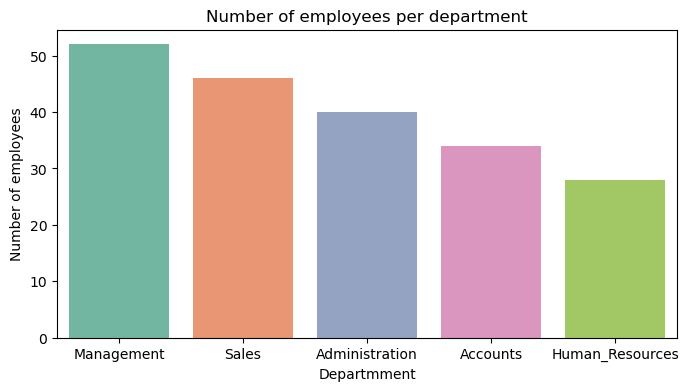

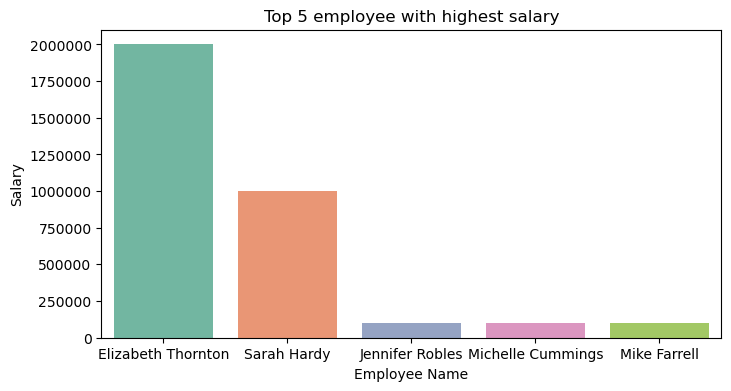

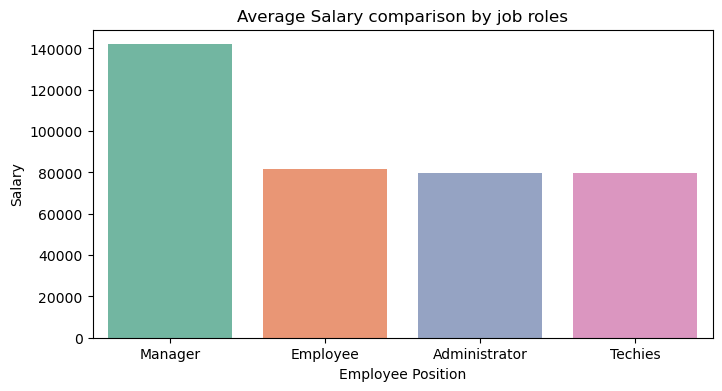

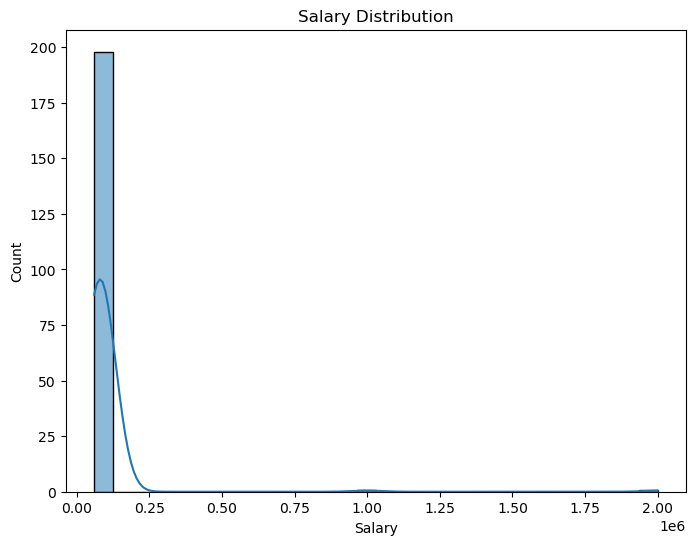

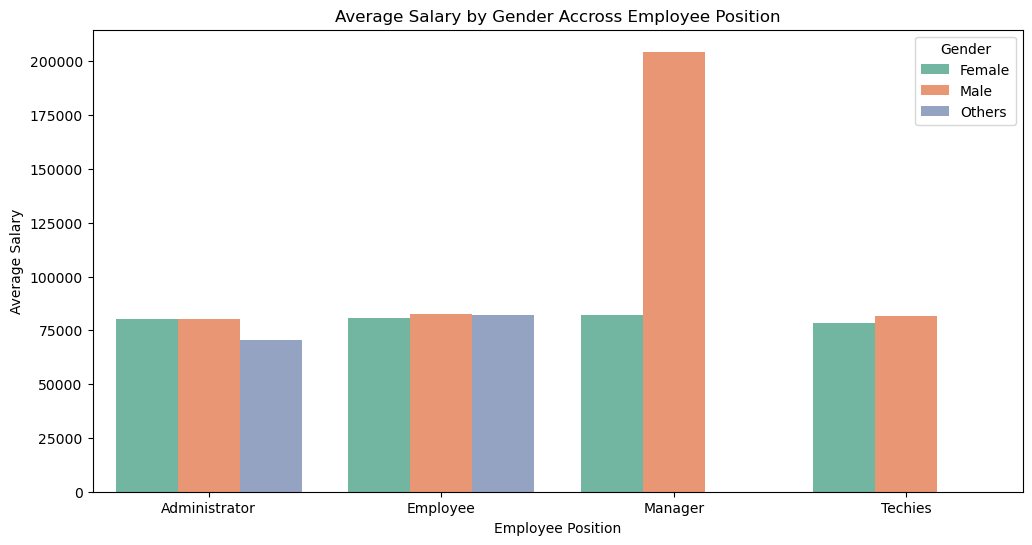

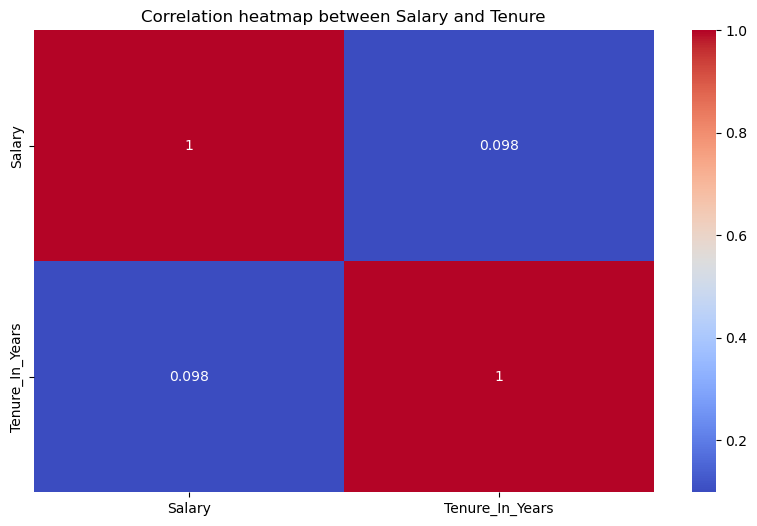

In [83]:
df.to_csv("Cleaned_Data.csv", index = False)
print("\nThe file downloaded successfully under name: 'Cleaned_Data.csv'.")

# Which department employ more people - 

employee_count = (df["Department"].value_counts()).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x="Department",y="count",hue="Department",data=employee_count,palette="Set2")
plt.title("Number of employees per department")
plt.xlabel("Departmment")
plt.ylabel("Number of employees")
plt.show()


# Top 5 employee in term of salary - 

top_5 = (df.sort_values(by="Salary", ascending=False)).head(5)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(x="Employee Name",y="Salary",hue="Employee Name",data=top_5, palette="Set2")
plt.title("Top 5 employee with highest salary")
plt.xlabel("Employee Name")
plt.ylabel("Salary")
plt.ticklabel_format(style="plain",axis="y")
plt.show()


# Average Salary comparison by job roles - 

top_salary_pos = (df.groupby("Employee Position")["Salary"].mean().sort_values(ascending=False)).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x="Employee Position", y="Salary", data=top_salary_pos, hue="Employee Position", palette="Set2")
plt.title("Average Salary comparison by job roles")
plt.xlabel("Employee Position")
plt.ylabel("Salary")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

# Salary Distribution - 

plt.figure(figsize=(8,6))
sns.histplot(x="Salary",bins=30,data=df, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

# Is there gender pay disparity - 

salary_by_gender = (df.groupby(["Employee Position","Gender"])["Salary"].mean().round(2)).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="Employee Position", y="Salary", hue="Gender",data=salary_by_gender,palette="Set2")
plt.title("Average Salary by Gender Accross Employee Position")
plt.xlabel("Employee Position")
plt.ylabel("Average Salary")
plt.show()


# Do higher salary correlate with longer tenure?

df["Hire Date"] = pd.to_datetime(df["Hire Date"],dayfirst=True, errors="coerce")
df["Tenure_In_Years"] = (pd.Timestamp("today") - df["Hire Date"]).dt.days/365

salary_corr = df[["Salary","Tenure_In_Years"]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(salary_corr, cmap = "coolwarm", annot=True)
plt.title("Correlation heatmap between Salary and Tenure")
plt.show()

In [59]:
# Average age by job role - 

avg_age = (df.groupby("Employee Position")["Age"].mean().round(1).sort_values(ascending=False)).reset_index()
avg_age

,Employee Position,Age
0,Employee,48.1
1,Administrator,47.1
2,Manager,46.6
3,Techies,46.0


In [62]:
# Departmental Workforce Structure - 

workforce = pd.crosstab(df["Department"], df["Employee Position"])
workforce

Employee Position,Administrator,Employee,Manager,Techies
Department,,,,
Accounts,10,9,7,8
Administration,10,13,10,7
Human_Resources,8,4,7,9
Management,9,15,14,14
Sales,10,13,9,14


In [74]:
# High tenure & low salary

salary_impairment = df[(df["Tenure_In_Years"]>5) & (df["Salary"]<df["Salary"].median())]
salary_impairment

,Employee ID,Employee Name,Employee Position,Salary,Age,Gender,Department,Hire Date,Tenure_In_Years
1,2,Jennifer Newton,Employee,66717,46,Male,Management,2018-11-04,7.147945
72,7,Brandon Carroll,Employee,82059,36,Others,Management,2020-06-20,5.520548
203,11,Jeffrey Dominguez,Employee,78965,35,Male,Accounts,2018-06-26,7.506849
138,12,Darryl Rodriguez,Techies,78217,59,Female,Sales,2019-01-18,6.942466
85,15,Brian Cooper,Techies,77691,65,Male,Human_Resources,2019-10-12,6.210959
23,33,Tony Martin,Employee,77370,63,Female,Sales,2018-11-15,7.117808
55,34,Tyler Shaw,Employee,80428,55,Female,Management,2019-04-21,6.687671
126,36,Carolyn Weaver,Administrator,61378,65,Male,Administration,2018-12-10,7.049315
196,37,Dana Schneider,Employee,60471,34,Male,Sales,2020-04-07,5.723288
70,39,Ashley Valentine,Employee,78250,61,Male,Administration,2020-09-01,5.320548


In [92]:
# Business Insights - 
print("\n\n======================INSIGHTS======================\n")
print("1) Largest number of employees are in Management,\n"
      "   suggesting a management heavy organisational structure.")
print("\n2) The highest paid employee earning significantly more than rest of employees.\n"
      "   Top 2 employees shares a large share of the payroll.")
print("\n3) Managerial roles draws significantly higher average salaries, means greater responsibility.")
print("\n4) Salary distribution is highly right skewed, indicating that a majority of employees earns in\n"
      "   lower range while a small number of employees draws very high salary.")
print("\n5) In Non-managerial roles, average salary accross gender are similar.\n"
      "   There is a gap at managerial role due to salary outliers.")
print("\n6) Salary shows a very weak positive correlation with tenure(0.098),\n"
      "   indicating tenure have a very little impact on salary.")
print("\n7) Management and Sales department have the highest number of employees,\n"
      "   indicating their importance within the organization.")
print("\n8) Sevaral long_tenured employees earn below the median salary, indicating potential retention risk.")



======================INSIGHTS======================

1) Largest number of employees are in Management,
   suggesting a management heavy organisational structure.

2) The highest paid employee earning significantly more than rest of employees.
   Top 2 employees shares a large share of the payroll.

3) Managerial roles draws significantly higher average salaries, means greater responsibility.

4) Salary distribution is highly right skewed, indicating that a majority of employees earns in
   lower range while a small number of employees draws very high salary.

5) In Non-managerial roles, average salary accross gender are similar.
   There is a gap at managerial role due to salary outliers.

6) Salary shows a very weak positive correlation with tenure(0.098),
   indicating tenure have a very little impact on salary.

7) Management and Sales department have the highest number of employees,
   indicating their importance within the organization.

8) Sevaral long_tenured employees earn b